# Aprendizado Supervisionado com scikit-learn


Sobre tarefa de regressão em ML:


Abaixo importamos pandas para tratar os dados:

In [ ]:
# Importando pandas
import pandas as pd
# Importando os dados

advertising = pd.read_csv('advertising_and_sales_clean.csv')


Vamos utilizar os dados de advertising. Esses dados contém informações sobre os gastos da campanha publicitária em diferentes tipos de mídia e o número de dólares gerados em vendas para a respectiva campanha

In [ ]:
publicidade = advertising
publicidade.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [ ]:
publicidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


###REGRESSÃO LINEAR SIMPLES

Vamos agora criar um array numpy da variavel X que vamos usar como preditora:Radio:

In [ ]:
X = publicidade['radio'].values
type(X)

numpy.ndarray

Agora vamos chamar de y a variavel target(alvo) que que queremos prever:

In [ ]:
y = publicidade['sales'].values

Observe que a variavel X esta em uma dimensao, porém para ser usado no sklearn deve ter duas dismensoes

In [ ]:
print(X)

[ 6566.23  9237.76 15886.45 ... 19800.07 17534.64 15966.69]


Vamos usar o reshape para corrigir isso:

In [ ]:
X = X.reshape(-1,1)
print(X)
print(X.shape)

[[ 6566.23]
 [ 9237.76]
 [15886.45]
 ...
 [19800.07]
 [17534.64]
 [15966.69]]
(4546, 1)


Vamos printar o shape dos dois para verificar se as dimensões estão ok:

In [ ]:
print(X.shape, y.shape)

(4546, 1) (4546,)


Agora que as variaveis ja estão no formato ideal para o sklearn  vamos ajustar um modelo de regressão linear usando essa feature e a variavel target.
Do sklearn vamos importar o modulo linear_model vamos usar a classe Linear Rgression

In [ ]:
from sklearn.linear_model import LinearRegression

Criando um modelo(instanciando):

In [ ]:
lm = LinearRegression()

AGora vamos ajustar X e y:


In [ ]:
lm.fit(X,y)

LinearRegression()

Agora vamos fazer previsoes usando todo o conjunto X:

In [ ]:
previsoes = lm.predict(X)
print(previsoes[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


Vamos agora visualizar o ajuste do modelo:

In [ ]:
import matplotlib.pyplot as plt

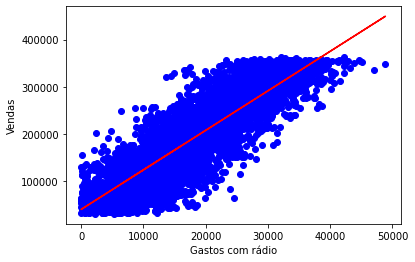

In [ ]:
plt.scatter(X,y, color ='blue')
plt.plot(X, previsoes, color = 'Red')
plt.xlabel('Gastos com rádio')
plt.ylabel('Vendas')
plt.show()

Vamos agora repetir o que fizemos anteriormente, porém agora de forma mais precisa. Anteriormente usamos todo o conjunto de dados para ajustar nosso modelo e na prática isso não é correto pois não sobra dados para testar o quanto nosso modelo é bom! Vamos então separar nosso conjunto de dados em duas partes: treino e teste.Além disso vamos retirar por hora a variavel 'influencer' que não é numerica e usaremos as outras variaveis para ajustar um modelo.
O conjunto de treino será usados para treinar(ajustar) nosso modelo. O conjunto de teste será usado para avaliar a precisçao do mesmo! Vamos lá


In [ ]:
publicidade = publicidade.drop('influencer', axis =1)

In [ ]:
#Vamos criar o conjunto de treino(X) e  o conjunto de teste(y):

In [ ]:
publicidade.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


In [ ]:
X  = publicidade.drop('sales', axis =1).values
print(X)

[[16000.    6566.23  2907.98]
 [13000.    9237.76  2409.57]
 [41000.   15886.45  2913.41]
 ...
 [44000.   19800.07  5096.19]
 [71000.   17534.64  1940.87]
 [42000.   15966.69  5046.55]]


In [ ]:
y = publicidade['sales'].values
print(y)

[ 54732.76  46677.9  150177.83 ... 163631.46 253610.41 148202.41]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
X_treino.shape, y_treino.shape

((3182, 3), (3182,))

In [ ]:
X_teste.shape, y_teste.shape

((1364, 3), (1364,))

Agora vamos instabciar o modelo:

In [ ]:
reg = LinearRegression()

Agora vamos ajustar o modelo:

In [ ]:
reg.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
y_prev = reg.predict(X_teste)

Agora vamos comparar os resultados:

In [ ]:
print(f'Os quatro primeiros valores reais são {y_teste[:4]}\n Os quatro primeiros previstos são: {y_prev[:4]}')

Os quatro primeiros valores reais são [ 55261.28  67574.9  272250.11 195102.18]
 Os quatro primeiros previstos são: [ 53176.66154234  70996.19873235 267032.64132081 195731.02438566]


Bom até agora treinamos(ajustamos) um modelo de regressão multipla aos nossos dados de treino(X_treino, y_treino) e aplicamos o modelo nos dados não visots pelo modelo, os dados de teste(X_teste) para criar previsões. Precisamos agora medir a performance desse nosso modelo. Será que as previsões que obtemos são boas?

Vamos então usar duas métricas para avaliar o modelo, o R^2 e o mean_square_error(erro quadrático médio)

In [ ]:
#R^2

r_quadrado = reg.score(X_teste, y_teste)
#print(r_quadrado)
#raiz do erro quadratico medio
#preciso importar
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_teste, y_prev)
#print(round(rmse))

print(f'R^2: {r_quadrado}\nrmse: {round(mse)}')

R^2: 0.9990152104759368
rmse: 8669687


O método utilizado acima, de dividir o conjunto de dados em treino e teste já nos da uma ideia da performance do modelo. Essa metodologia porém também tem suas falhas, afinal o conjunto de teste escolhido pode não ser um conjunto representativo de todos
os dados do nosso conjunto. Para evitar isso e melhorar a avaliação do modelo utilizamos a validação cruzada.
A validação cruzada é uma abordagem vital para avaliar um modelo. Ele maximiza a quantidade de dados disponíveis para o modelo, pois o modelo não é apenas treinado, mas também testado em todos os dados disponíveis.

Resumindo:

Motivação de validação cruzada

- O desempenho do modelo depende da maneira como dividimos os dados
- O  R^2 ou outra métrica de avaliação no conjunto de teste não representa a capacidade do modelo de generalizar para dados não vistos
- Solução: validação cruzada

Vamos construir novamente um modelo de regressão linear e, em seguida, usará validação cruzada de 6 conjuntos para avaliar sua precisão para prever vendas usando gastos com publicidade em mídia social. Você exibirá a pontuação individual para cada uma das seis dobras.


In [ ]:
#Importanto o modelo
from sklearn.model_selection import cross_val_score, KFold


In [ ]:
kf = KFold(n_splits=6, shuffle=True,random_state=5)

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
...     print(f"Fold {i}:")
...     print(f"  Treino: index={train_index}")
...     print(f"  Teste:  index={test_index}")

Fold 0:
  Treino: index=[   0    1    2 ... 4543 4544 4545]
  Teste:  index=[   9   19   28   47   49   54   59   73   76   84   95   97  101  111
  139  142  146  148  150  167  169  173  175  177  179  184  191  194
  222  228  231  240  242  261  265  266  278  279  285  314  317  321
  324  325  329  336  342  350  356  359  378  385  390  394  406  416
  417  418  424  444  447  457  466  467  468  470  476  491  526  527
  532  544  557  559  560  563  564  569  576  580  584  586  589  594
  599  600  601  603  611  613  619  621  622  629  641  651  653  667
  668  678  684  685  695  710  711  714  716  720  722  729  735  753
  757  758  769  771  781  782  784  791  795  796  805  807  812  814
  815  816  818  849  850  853  857  859  865  869  871  874  877  884
  887  889  890  902  909  928  944  947  948  952  953  958  960  963
  966  975  978  979  982  999 1002 1008 1020 1023 1025 1036 1039 1059
 1062 1066 1071 1072 1081 1103 1105 1123 1125 1128 1135 1149 1151 1155
 

In [ ]:
reg = LinearRegression()


In [ ]:

cv_score = cross_val_score(estimator= reg,X = X, y= y,cv=kf)

In [ ]:
print(cv_score)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


Vamos agora calcular algumas estatisticas do nosso conjunto de R^2 's. Para isso vamos usar o numpy.


In [ ]:
import numpy as np

Média:

In [ ]:
np.mean(cv_score)

0.9989896443678249

Desvio Padrão:

In [ ]:
np.std(cv_score)

6.608118371529651e-05

intervalo de confiança - 95%:

In [ ]:
np.quantile(cv_score, [0.025,0.975])

array([0.99889767, 0.99908583])

1. Regularização em regressão linear

Agora vamos explorar a regularização na regressão, uma técnica usada para evitar o overfitting.

2. Por que regularizar?
Lembre-se de que o ajuste de um modelo de regressão linear minimiza uma função de perda para escolher um coeficiente, a, para cada recurso e a interceptação, b. Se permitirmos que esses coeficientes sejam muito grandes, podemos obter overfitting. Portanto, é prática comum alterar a função de perda para penalizar coeficientes grandes. Isso se chama regularização.

In [ ]:
# Importando Ridge
from sklearn.linear_model import Ridge

alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0] #testando alphas
ridge_scores = []
for alpha in alphas:

  # Criando a regressão
  ridge = Ridge(alpha= alpha)

  # ajustando o modelo
  ridge.fit(X_treino,y_treino)

  # R^2
  score = ridge.score(X_teste, y_teste)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764388, 0.9990152104809561]


Vamos usar agora utilizar a  regressão Lasso  - ela cria um modelo que reduzirá alguns dos coeficientes da equação de regressão, podendo chegar a zero.
Quando falamos de Regressão Lasso estamos tratando de uma regressão semelhante à linear, só que aqui o que ocorre é a minimização da soma dos resíduos quadrados somados a uma constante lambda multiplicada pela soma dos coeficientes em módulo.

Podemos usar a regressão lasso para ver a importancia das variaveis preditoras no modelo
Vamos ver isso no sklearn:

In [ ]:
colunas_preditoras = publicidade.drop('sales', axis=1)
colunas_preditoras.columns

Index(['tv', 'radio', 'social_media'], dtype='object')

[ 3.56256962 -0.00397035  0.00496385]


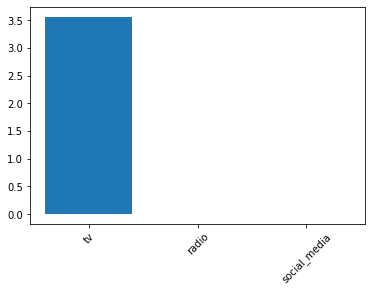

In [ ]:
# Importando Lasso
from sklearn.linear_model import Lasso

# Instanciando a
lasso = Lasso(alpha = 0.3) # alpha é o lambda na equação acima

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(colunas_preditoras.columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

Veja como a figura deixa claro que o gasto com propaganda na TV é a característica mais importante do conjunto de dados para prever os valores das vendas!